# Problem statement: Fake News Detection

### Importing the necessary libraries and the dataset

In [98]:
#importing the required libraries: 
import pandas as pd
#for text preprocessing 
from sklearn.feature_extraction.text import CountVectorizer 
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import MultinomialNB  
from sklearn import metrics 
import numpy as np  
import itertools
from sklearn.linear_model import PassiveAggressiveClassifier

In [55]:
df= pd.read_csv("fake-news/train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [42]:
print("The number of rows are :" ,df.shape[0] , " \nThe number of columns are : ", df.shape[1])

The number of rows are : 20800  
The number of columns are :  5


### Insight 
- The dataset is taken from kaggle link-
- The dataset has 20800 rows and 5 Columns.

### Preparing the dataset for Text preprocessing

In [44]:
# Getting the independent feature by droping the target variable from our dataset: 
x= df.drop('label', axis=1)
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [45]:
#getting the target variable :  
y=df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [43]:
#Checking the null values
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [56]:
#dropping the record with missing value
df=df.dropna()
df.shape

In [57]:
df.head(15)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


### Insights:   
- The dataset has 4 independent features and the target variable is "label" we create two dataframe x and y having independent and dependant feature respectively.
- There are missing values in the features "title" , "author" and "text".
- We drop those records with missing values because if the dataframe has null values we cant apply any feature engeneering on the dataframe.
- After the null values are removed we can see that 6th ,8th recored are deleted probably they had null values.

### Text preprocessing

Cleaning the text by removinng unimportant words

In [58]:
#Creating a copy of the dataframe
messages= df.copy()

In [59]:
# for ordering the indexes
messages.reset_index(inplace= True)
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [69]:
# to remove all the stop words and stemming  
ps= PorterStemmer()
# will will store all the processed words 
corpus=[] 
for i in range (0, len(messages)):  
    review= re.sub('[^a-z-A-Z]', ' ', messages['title'][i])
    review= review.lower()
    review= review.split()  
    review= [ps.stem(word) for word in review if not word in stopwords.words('english')]  
    
    review = ' '.join(review)
    corpus.append(review)

In [70]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu - breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video - breitbart',
 'beno hamon win french socialist parti presidenti nomin - new york time',
 'back-channel plan ukrain russia courtesi trump associ - new york time',
 'obama organ action partner soros-link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success - new york time',
 'well fargo chief abruptli step - new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fb

### Insights:  
- In text preprocessing we are cleaning the text for modelling.
- We copied the dataframe "df" in a new variable "messages" after dropping the records with null values from the dataframe the index becomes unordered . So we order the index.
- Then we remove all the unwanted characters ,spaces with the help of re library, also all the words are converted into lower case then we split the words for applying stemming on them for those words which are not in the list of stopwords .
- We have an empty list named corpus which will store every words which are not stop words after stemming operation on them.

### Modelling

In [71]:
# Creating Bag of words model 
cv= CountVectorizer(max_features=5000, ngram_range=(1,3))
x=cv.fit_transform(corpus).toarray()

In [72]:
x.shape

(18285, 5000)

In [74]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [77]:
#Considering the output feature:  
y=messages['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [79]:
x_train,x_test, y_train, y_test= train_test_split(x,y, test_size=0.33, random_state=0)  


In [81]:
cv.get_feature_names_out()[:20]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'accept', 'access', 'access pipelin',
       'access pipelin protest', 'accid'], dtype=object)

In [82]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [84]:
#Nameing the feature names
count_df= pd.DataFrame(x_train,columns=cv.get_feature_names_out())
count_df.head()


,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Plot

In [90]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### Insights: 
- We have created a Bag of Words model using CountVectorizer with 
max_features=5000 limits the vocabulary to the top 5000 most frequent word, 
ngram_range=(1,3) specifies that unigrams, bigrams, and trigrams should be consider then the words in corpus is converted into numerical matrix of word counts and converts it to a NumPy array.
- We split the data into training and testing sets, with 33% of the data used for testing.
- Then the parameters used in the CountVectorizer, such as max_features, ngram_range, etc are displayed.y. 

### Performing different Algorithm to work with text data

#### MultinomialNB Algorithm

accuracy:   0.901
Confusion matrix, without normalization


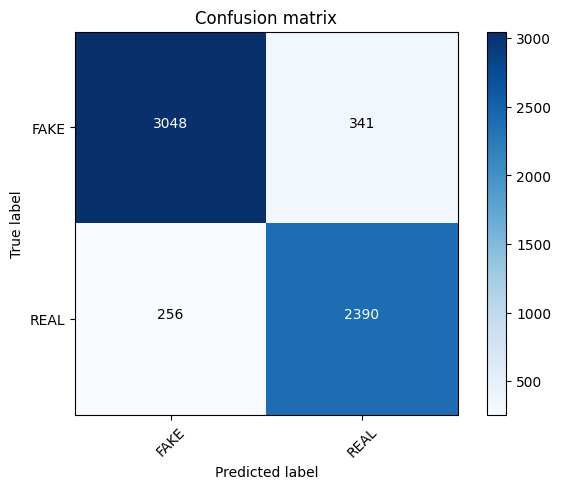

In [97]:
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Multinomial Classifier with Hyperparameter

In [102]:
classifier=MultinomialNB(alpha=0.1) 
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(x_train,y_train)
    y_pred=sub_classifier.predict(x_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\tania\anaconda3\envs\simplilearn\Lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\tania\anaconda3\envs\simplilearn\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Score : 0.8886495443247722
Alpha: 0.1, Score : 0.9009113504556753
Alpha: 0.2, Score : 0.9005799502899752
Alpha: 0.30000000000000004, Score : 0.9002485501242751
Alpha: 0.4, Score : 0.8994200497100249
Alpha: 0.5, Score : 0.899917149958575
Alpha: 0.6000000000000001, Score : 0.9002485501242751
Alpha: 0.7000000000000001, Score : 0.9009113504556753
Alpha: 0.8, Score : 0.899751449875725
Alpha: 0.9, Score : 0.9004142502071251


#### Passive Aggressive Classifier Algorithm

accuracy:   0.920
Confusion matrix, without normalization


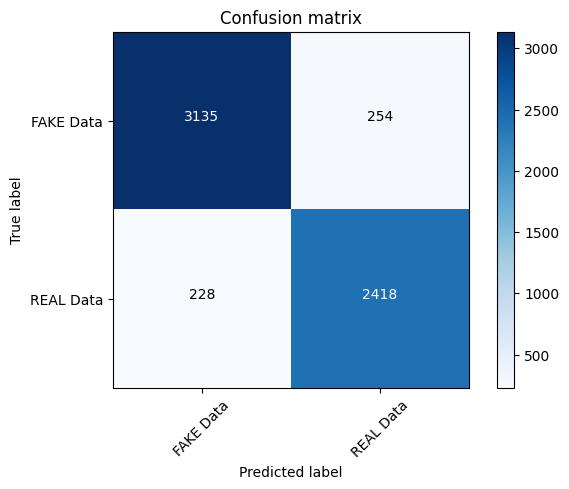

In [100]:
linear_clf = PassiveAggressiveClassifier() 
linear_clf.fit(x_train, y_train)
pred = linear_clf.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [107]:
## Get Features names
feature_names = cv.get_feature_names_out()
classifier.feature_log_prob_[0]

array([ -9.059905  ,  -9.059905  , -10.28772902, ...,  -9.99146321,
       -11.45780028,  -9.42091835])

In [109]:
### Most real words
sorted(zip(classifier.feature_log_prob_[0], feature_names), reverse=True)[:20]

[(-2.94597703337908, 'new'),
 (-2.994265748193042, 'time'),
 (-2.999908971332994, 'york'),
 (-3.0001447981428786, 'new york'),
 (-3.014157947837596, 'york time'),
 (-3.014157947837596, 'new york time'),
 (-3.964173746439325, 'breitbart'),
 (-4.0032732473213235, 'trump'),
 (-5.275026901940747, 'donald'),
 (-5.281933006737159, 'donald trump'),
 (-5.754388241161135, 'say'),
 (-5.99161718928566, 'obama'),
 (-6.015382566321127, 'clinton'),
 (-6.148982675661017, 'state'),
 (-6.148982675661017, 'presid'),
 (-6.176855160019354, 'report'),
 (-6.188225379160538, 'attack'),
 (-6.259303245577095, 'hous'),
 (-6.259303245577095, 'brief'),
 (-6.3161367203402605, 'hillari')]

In [110]:
### Most fake words
sorted(zip(classifier.feature_log_prob_[0], feature_names))[:20]

[(-11.45780027684292, 'access pipelin protest'),
 (-11.45780027684292, 'acknowledg emf'),
 (-11.45780027684292, 'acknowledg emf damag'),
 (-11.45780027684292, 'acquit'),
 (-11.45780027684292, 'acr'),
 (-11.45780027684292, 'adhd'),
 (-11.45780027684292, 'airstrik kill'),
 (-11.45780027684292, 'al nusra'),
 (-11.45780027684292, 'all tim'),
 (-11.45780027684292, 'america last'),
 (-11.45780027684292, 'america vote'),
 (-11.45780027684292, 'american concern'),
 (-11.45780027684292, 'american concern elect'),
 (-11.45780027684292, 'american peopl defeat'),
 (-11.45780027684292, 'arriv bosanski'),
 (-11.45780027684292, 'arriv bosanski prijevod'),
 (-11.45780027684292, 'ask question'),
 (-11.45780027684292, 'auf'),
 (-11.45780027684292, 'avail'),
 (-11.45780027684292, 'babi powder')]

### Insight 
- We perform "MultinomialNB Algorithm" with an accuracy of 0.901 but later we have seen that with hyperparameter tuning the accuracy score increased.
- "Multinomial Classifier with Hyperparameter" we observe that when Alpha: 0.2 then Score 0.9005799502899752 which is the highest accuracy.
- We perform "Passive Aggressive Classifier Algorithm" this algorithm works well with text data and this algorith gives an accuracy  0.920.
- We can see the top 10 list of most real words, "new" is considered the most real word.
- We can see the top 10 list of most fake words, "access pipelin protest" is concerned the most fake word .